In [2]:
# Um pequeno Sistema Fuzzy para mostrar o grau de pertencimento no Transtorno do Espectro Autista.
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

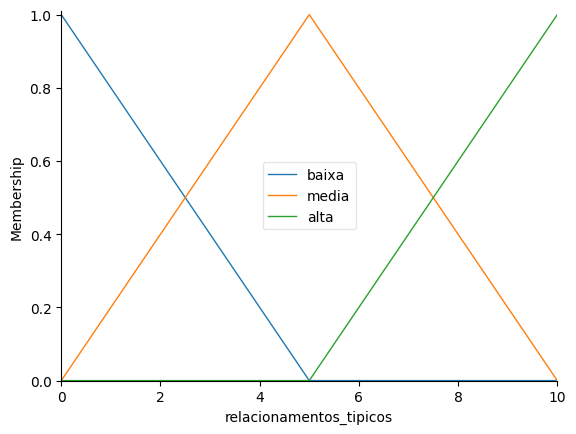

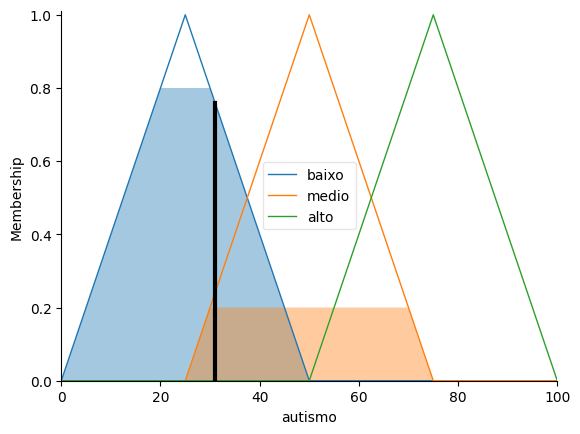

In [11]:
# Antecedentes: Inputs.

# Limitação: Compreensão, interesse ou respostas inadequadas às comunicações sociais verbais
# ou não verbais de outras pessoas.
comunicacao_verbal_nao_verbal = ctrl.Antecedent(
    np.arange(0, 11, 1), 'comunicacao_verbal_nao_verbal')

# Limitação: Integração da linguagem falada com dicas não verbais complementares típicas,
# como contato visual, gestos, expressões faciais e linguagem corporal.
visual_gestual_expressoes_corporal = ctrl.Antecedent(
    np.arange(0, 11, 1), 'visual_gestual_expressoes_corporal')

# Limitação: Compreensão e uso da linguagem em contextos sociais e capacidade de iniciar
# e manter conversas sociais recíprocas.
compreensao_linguagem_iniciar_conversa = ctrl.Antecedent(
    np.arange(0, 11, 1), 'compreensao_linguagem_iniciar_conversa')

# Limitação: Consciência social, levando a um comportamento que não é adequadamente
# modulado de acordo com o contexto social.
consciencia_social_comportamento_nao_modulado = ctrl.Antecedent(
    np.arange(0, 11, 1), 'consciencia_social_comportamento_nao_modulado')

# Limitação: Capacidade de imaginar e responder aos sentimentos, estados emocionais e atitudes dos outros.
sentimento_emocao_atitude = ctrl.Antecedent(
    np.arange(0, 11, 1), 'sentimento_emocao_atitude')

# Limitação: Compartilhamento mútuo de interesses.
compartilhar_interesse = ctrl.Antecedent(
    np.arange(0, 11, 1), 'compartilhar_interesse')

# Limitação: Capacidade de fazer e manter relacionamentos típicos com pares.
relacionamentos_tipicos = ctrl.Antecedent(
    np.arange(0, 11, 1), 'relacionamentos_tipicos')

# Consequentes: Outputs
autismo = ctrl.Consequent(np.arange(0, 101, 1), 'autismo')  # 0 - 100

# Define as funções triangulares.

# Rótulos.
comunicacao_verbal_nao_verbal.automf(3, names=['baixa', 'media', 'alta'])
visual_gestual_expressoes_corporal.automf(3, names=['baixa', 'media', 'alta'])
compreensao_linguagem_iniciar_conversa.automf(
    3, names=['baixa', 'media', 'alta'])
consciencia_social_comportamento_nao_modulado.automf(
    3, names=['baixa', 'media', 'alta'])
sentimento_emocao_atitude.automf(3, names=['baixa', 'media', 'alta'])
compartilhar_interesse.automf(3, names=['baixa', 'media', 'alta'])
relacionamentos_tipicos.automf(3, names=['baixa', 'media', 'alta'])
relacionamentos_tipicos.view()
# _______________________________________________________________________________________

autismo['baixo'] = fuzz.trimf(autismo.universe, [0, 25, 50])
autismo['medio'] = fuzz.trimf(autismo.universe, [25, 50, 75])
autismo['alto'] = fuzz.trimf(autismo.universe, [50, 75, 100])

# Regras
regra1 = ctrl.Rule(comunicacao_verbal_nao_verbal['baixa'] &
                   visual_gestual_expressoes_corporal['baixa'] &
                   compreensao_linguagem_iniciar_conversa['baixa'] &
                   consciencia_social_comportamento_nao_modulado['baixa'] &
                   sentimento_emocao_atitude['baixa'] &
                   compartilhar_interesse['baixa'] &
                   relacionamentos_tipicos['baixa'], autismo['baixo'])

regra2 = ctrl.Rule(comunicacao_verbal_nao_verbal['media'] &
                   visual_gestual_expressoes_corporal['media'] &
                   compreensao_linguagem_iniciar_conversa['media'] &
                   consciencia_social_comportamento_nao_modulado['media'] &
                   sentimento_emocao_atitude['media'] &
                   compartilhar_interesse['media'] &
                   relacionamentos_tipicos['media'], autismo['medio'])

regra3 = ctrl.Rule(comunicacao_verbal_nao_verbal['alta'] &
                   visual_gestual_expressoes_corporal['alta'] &
                   compreensao_linguagem_iniciar_conversa['alta'] &
                   consciencia_social_comportamento_nao_modulado['alta'] &
                   sentimento_emocao_atitude['alta'] &
                   compartilhar_interesse['alta'] &
                   relacionamentos_tipicos['alta'], autismo['alto'])


autismo_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
grau_autismo = ctrl.ControlSystemSimulation(autismo_ctrl)


# Passa os inputs para o ControlSystem utilizando os rótulos dos antecedentes.
grau_autismo.input['comunicacao_verbal_nao_verbal'] = 1
grau_autismo.input['visual_gestual_expressoes_corporal'] = 1
grau_autismo.input['compreensao_linguagem_iniciar_conversa'] = 1
grau_autismo.input['consciencia_social_comportamento_nao_modulado'] = 1
grau_autismo.input['sentimento_emocao_atitude'] = 1
grau_autismo.input['compartilhar_interesse'] = 1
grau_autismo.input['relacionamentos_tipicos'] = 1

grau_autismo.compute()

# print(valor_gorjeta.output['gorjeta'])
autismo.view(sim=grau_autismo)
